# Preprocessing and Model building - basic pipeline

### Overview

- [Reading features and class labels from file](#Reading-features-and-class-labels-from-file)
- [Eliminate any columns which are not needed](#Eliminate-any-columns-which-are-not-needed)
- [Dealing with missing data](#Dealing-with-missing-data)
  - [Identifying missing values in tabular data](#Identifying-missing-values-in-tabular-data)
  - [Eliminating samples or features with missing values](#Eliminating-samples-or-features-with-missing-values)
  - [Imputing missing values](#Imputing-missing-values)
- [Handling categorical data](#Handling-categorical-data)
  - [Mapping ordinal features](#Mapping-ordinal-features)
  - [Performing one-hot encoding on nominal features](#Performing-one-hot-encoding-on-nominal-features)
  - [Encoding class labels](#Encoding-class-labels)
- [Train and Test data Partition](#Train-and-Test-data-Partition)
- [Bringing features onto the same scale](#Bringing-features-onto-the-same-scale)
- [Check for class imbalance](#Check-for-class-imbalance)
- [Train a Random forest model](#Train-a-Random-forest-model)
- [Model Prediction](#Model-Prediction)
- [Confusion Matrix](#Confusion-Matrix)

<br>
<br>

# Reading features and class labels from file



* import pandas library
* Read file to a pandas data frame. The data frame is like a table with row names and column names.

The `sep` option indicates how the columns are separated.

The first row in the file is assumed to the header. If there is no header in the file, simply use the option `header=None`.

Missing values are assumed to be indicated by the following strings: 

‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’.
    
If there are addiional special strings which indicate missing values in the file, you can indicate that when you read the file using the option `na_values`
    
For more details on read_csv, see https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [88]:
import pandas as pd
df = pd.read_csv('breast_cancer_data.csv',sep=',',na_values=['?'])
df

,Samplecodenumber,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Mutation,Color,Class
0,1000025,5.0,1.0,1.0,1,2.0,1.0,3.0,NaN,1,Low,Transparent,benign
1,1002945,5.0,4.0,4.0,5,7.0,10.0,3.0,2.0,1,Low,Transparent,benign
2,1015425,3.0,1.0,1.0,1,2.0,2.0,3.0,1.0,1,Low,Transparent,benign
3,1016277,6.0,8.0,8.0,1,3.0,4.0,3.0,7.0,1,Low,Transparent,benign
4,1017023,4.0,1.0,1.0,3,2.0,1.0,3.0,1.0,1,Low,Transparent,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3.0,1.0,1.0,1,3.0,2.0,1.0,1.0,1,Low,Transparent,benign
695,841769,2.0,1.0,1.0,1,2.0,1.0,1.0,1.0,1,Low,Transparent,benign
696,888820,5.0,10.0,10.0,3,7.0,3.0,8.0,10.0,2,High,Dark,malignant
697,897471,4.0,8.0,6.0,4,3.0,4.0,10.0,6.0,1,High,Dark,malignant


# Eliminate any columns which are not needed

The `class` column indicates the class label. The `Samplecodenumber` indicates sample identification number and is not counted as a feature. It should be removed.

In [89]:
df1 = df.drop(columns=['Samplecodenumber'])
df1

,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Mutation,Color,Class
0,5.0,1.0,1.0,1,2.0,1.0,3.0,NaN,1,Low,Transparent,benign
1,5.0,4.0,4.0,5,7.0,10.0,3.0,2.0,1,Low,Transparent,benign
2,3.0,1.0,1.0,1,2.0,2.0,3.0,1.0,1,Low,Transparent,benign
3,6.0,8.0,8.0,1,3.0,4.0,3.0,7.0,1,Low,Transparent,benign
4,4.0,1.0,1.0,3,2.0,1.0,3.0,1.0,1,Low,Transparent,benign
...,...,...,...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1,3.0,2.0,1.0,1.0,1,Low,Transparent,benign
695,2.0,1.0,1.0,1,2.0,1.0,1.0,1.0,1,Low,Transparent,benign
696,5.0,10.0,10.0,3,7.0,3.0,8.0,10.0,2,High,Dark,malignant
697,4.0,8.0,6.0,4,3.0,4.0,10.0,6.0,1,High,Dark,malignant


###  Please refer to Python advanced data structures tutorial in Blackboard on how to select rows and columns from a data frame.
There are operations such as `.iloc` and `loc` which you can use.

# Dealing with missing data

All missing values are stored as `NaN` in the data frame.

## Identifying missing values in tabular data

Counts how many missing values are there in each column of the data frame.

In [90]:
df1.isnull().sum(axis=0)

ClumpThickness               1
UniformityofCellSize         1
UniformityofCellShape        1
MarginalAdhesion             0
SingleEpithelialCellSize     1
BareNuclei                  17
BlandChromatin               1
NormalNucleoli               2
Mitoses                      0
Mutation                     1
Color                        2
Class                        0
dtype: int64

## Eliminating samples or features with missing values

In [91]:
# remove rows that contain missing values
df2 = df1.dropna(axis=0)
df2

,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Mutation,Color,Class
1,5.0,4.0,4.0,5,7.0,10.0,3.0,2.0,1,Low,Transparent,benign
2,3.0,1.0,1.0,1,2.0,2.0,3.0,1.0,1,Low,Transparent,benign
3,6.0,8.0,8.0,1,3.0,4.0,3.0,7.0,1,Low,Transparent,benign
4,4.0,1.0,1.0,3,2.0,1.0,3.0,1.0,1,Low,Transparent,benign
5,8.0,10.0,10.0,8,7.0,10.0,9.0,7.0,1,High,Dark,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1,3.0,2.0,1.0,1.0,1,Low,Transparent,benign
695,2.0,1.0,1.0,1,2.0,1.0,1.0,1.0,1,Low,Transparent,benign
696,5.0,10.0,10.0,3,7.0,3.0,8.0,10.0,2,High,Dark,malignant
697,4.0,8.0,6.0,4,3.0,4.0,10.0,6.0,1,High,Dark,malignant


In [92]:
# remove columns that contain missing values
df3=df1.dropna(axis=1)
df3

,MarginalAdhesion,Mitoses,Class
0,1,1,benign
1,5,1,benign
2,1,1,benign
3,1,1,benign
4,3,1,benign
...,...,...,...
694,1,1,benign
695,1,1,benign
696,3,2,malignant
697,4,1,malignant


In [93]:
# only drop rows where all columns are NaN
df4=df1.dropna(how='all')
df4

,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Mutation,Color,Class
0,5.0,1.0,1.0,1,2.0,1.0,3.0,NaN,1,Low,Transparent,benign
1,5.0,4.0,4.0,5,7.0,10.0,3.0,2.0,1,Low,Transparent,benign
2,3.0,1.0,1.0,1,2.0,2.0,3.0,1.0,1,Low,Transparent,benign
3,6.0,8.0,8.0,1,3.0,4.0,3.0,7.0,1,Low,Transparent,benign
4,4.0,1.0,1.0,3,2.0,1.0,3.0,1.0,1,Low,Transparent,benign
...,...,...,...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1,3.0,2.0,1.0,1.0,1,Low,Transparent,benign
695,2.0,1.0,1.0,1,2.0,1.0,1.0,1.0,1,Low,Transparent,benign
696,5.0,10.0,10.0,3,7.0,3.0,8.0,10.0,2,High,Dark,malignant
697,4.0,8.0,6.0,4,3.0,4.0,10.0,6.0,1,High,Dark,malignant


In [94]:
# drop rows that have less than 3 real values 
df5=df1.dropna(thresh=4)
df5

,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Mutation,Color,Class
0,5.0,1.0,1.0,1,2.0,1.0,3.0,NaN,1,Low,Transparent,benign
1,5.0,4.0,4.0,5,7.0,10.0,3.0,2.0,1,Low,Transparent,benign
2,3.0,1.0,1.0,1,2.0,2.0,3.0,1.0,1,Low,Transparent,benign
3,6.0,8.0,8.0,1,3.0,4.0,3.0,7.0,1,Low,Transparent,benign
4,4.0,1.0,1.0,3,2.0,1.0,3.0,1.0,1,Low,Transparent,benign
...,...,...,...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1,3.0,2.0,1.0,1.0,1,Low,Transparent,benign
695,2.0,1.0,1.0,1,2.0,1.0,1.0,1.0,1,Low,Transparent,benign
696,5.0,10.0,10.0,3,7.0,3.0,8.0,10.0,2,High,Dark,malignant
697,4.0,8.0,6.0,4,3.0,4.0,10.0,6.0,1,High,Dark,malignant


In [95]:
# only drop rows where NaN appear in specific columns (here: 'Mutation')
df6=df1.dropna(subset=['Mutation'])
df6

,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Mutation,Color,Class
0,5.0,1.0,1.0,1,2.0,1.0,3.0,NaN,1,Low,Transparent,benign
1,5.0,4.0,4.0,5,7.0,10.0,3.0,2.0,1,Low,Transparent,benign
2,3.0,1.0,1.0,1,2.0,2.0,3.0,1.0,1,Low,Transparent,benign
3,6.0,8.0,8.0,1,3.0,4.0,3.0,7.0,1,Low,Transparent,benign
4,4.0,1.0,1.0,3,2.0,1.0,3.0,1.0,1,Low,Transparent,benign
...,...,...,...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1,3.0,2.0,1.0,1.0,1,Low,Transparent,benign
695,2.0,1.0,1.0,1,2.0,1.0,1.0,1.0,1,Low,Transparent,benign
696,5.0,10.0,10.0,3,7.0,3.0,8.0,10.0,2,High,Dark,malignant
697,4.0,8.0,6.0,4,3.0,4.0,10.0,6.0,1,High,Dark,malignant


## Imputing missing values


Impute missing values via the most common value in the column. This strategy works both on numerical and categorial columns

Explore other strategies here https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

You can also choose `mean` strategy but it will only work on  numerical features. 


In [96]:
from sklearn.impute import SimpleImputer 
import numpy as np
imr = SimpleImputer(missing_values= np.nan, strategy='most_frequent')
imr = imr.fit(df1.values)
df_imputed = imr.transform(df1)
df_imputed = pd.DataFrame(df_imputed,columns=df1.columns)

C:\Users\soibamb\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


Check if there are any missing values

In [69]:
df_imputed.isnull().sum(axis=0)

ClumpThickness              0
UniformityofCellSize        0
UniformityofCellShape       0
MarginalAdhesion            0
SingleEpithelialCellSize    0
BareNuclei                  0
BlandChromatin              0
NormalNucleoli              0
Mitoses                     0
Mutation                    0
Color                       0
Class                       0
dtype: int64

# Handling categorical data

## Mapping ordinal features

Lets use `df2` which is the data frame after removing rows that contain missing values.

In [97]:
size_mapping = {'High': 2,
                'Low': 1}

df2['Mutation'] = df2['Mutation'].map(size_mapping)
df2

C:\Users\soibamb\AppData\Local\Temp\ipykernel_22140\390378753.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Mutation'] = df2['Mutation'].map(size_mapping)


,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Mutation,Color,Class
1,5.0,4.0,4.0,5,7.0,10.0,3.0,2.0,1,1,Transparent,benign
2,3.0,1.0,1.0,1,2.0,2.0,3.0,1.0,1,1,Transparent,benign
3,6.0,8.0,8.0,1,3.0,4.0,3.0,7.0,1,1,Transparent,benign
4,4.0,1.0,1.0,3,2.0,1.0,3.0,1.0,1,1,Transparent,benign
5,8.0,10.0,10.0,8,7.0,10.0,9.0,7.0,1,2,Dark,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1,3.0,2.0,1.0,1.0,1,1,Transparent,benign
695,2.0,1.0,1.0,1,2.0,1.0,1.0,1.0,1,1,Transparent,benign
696,5.0,10.0,10.0,3,7.0,3.0,8.0,10.0,2,2,Dark,malignant
697,4.0,8.0,6.0,4,3.0,4.0,10.0,6.0,1,2,Dark,malignant


## Performing one-hot encoding on nominal features

In [98]:
df2 = pd.get_dummies(df2, columns=['Color'])
df2

,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Mutation,Class,Color_Dark,Color_Transparent
1,5.0,4.0,4.0,5,7.0,10.0,3.0,2.0,1,1,benign,0,1
2,3.0,1.0,1.0,1,2.0,2.0,3.0,1.0,1,1,benign,0,1
3,6.0,8.0,8.0,1,3.0,4.0,3.0,7.0,1,1,benign,0,1
4,4.0,1.0,1.0,3,2.0,1.0,3.0,1.0,1,1,benign,0,1
5,8.0,10.0,10.0,8,7.0,10.0,9.0,7.0,1,2,malignant,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1,3.0,2.0,1.0,1.0,1,1,benign,0,1
695,2.0,1.0,1.0,1,2.0,1.0,1.0,1.0,1,1,benign,0,1
696,5.0,10.0,10.0,3,7.0,3.0,8.0,10.0,2,2,malignant,1,0
697,4.0,8.0,6.0,4,3.0,4.0,10.0,6.0,1,2,malignant,1,0


## Encoding class labels

In [99]:
# to convert class labels from strings to integers
import numpy as np
# create a mapping dict
# to convert class labels from strings to integers
class_mapping = {label: idx for idx, label in enumerate(np.unique(df2['Class']))}
class_mapping

{'benign': 0, 'malignant': 1}

In [100]:
df2['Class'] = df2['Class'].map(class_mapping)
df2

,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Mutation,Class,Color_Dark,Color_Transparent
1,5.0,4.0,4.0,5,7.0,10.0,3.0,2.0,1,1,0,0,1
2,3.0,1.0,1.0,1,2.0,2.0,3.0,1.0,1,1,0,0,1
3,6.0,8.0,8.0,1,3.0,4.0,3.0,7.0,1,1,0,0,1
4,4.0,1.0,1.0,3,2.0,1.0,3.0,1.0,1,1,0,0,1
5,8.0,10.0,10.0,8,7.0,10.0,9.0,7.0,1,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1,3.0,2.0,1.0,1.0,1,1,0,0,1
695,2.0,1.0,1.0,1,2.0,1.0,1.0,1.0,1,1,0,0,1
696,5.0,10.0,10.0,3,7.0,3.0,8.0,10.0,2,2,1,1,0
697,4.0,8.0,6.0,4,3.0,4.0,10.0,6.0,1,2,1,1,0


# Train and Test data Partition

In [101]:
from sklearn.model_selection import train_test_split

df2_features = df2.drop(columns=['Class'])
df2_features

,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Mutation,Color_Dark,Color_Transparent
1,5.0,4.0,4.0,5,7.0,10.0,3.0,2.0,1,1,0,1
2,3.0,1.0,1.0,1,2.0,2.0,3.0,1.0,1,1,0,1
3,6.0,8.0,8.0,1,3.0,4.0,3.0,7.0,1,1,0,1
4,4.0,1.0,1.0,3,2.0,1.0,3.0,1.0,1,1,0,1
5,8.0,10.0,10.0,8,7.0,10.0,9.0,7.0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1,3.0,2.0,1.0,1.0,1,1,0,1
695,2.0,1.0,1.0,1,2.0,1.0,1.0,1.0,1,1,0,1
696,5.0,10.0,10.0,3,7.0,3.0,8.0,10.0,2,2,1,0
697,4.0,8.0,6.0,4,3.0,4.0,10.0,6.0,1,2,1,0


In [104]:
df2_class = df2['Class']
df2_class

1      0
2      0
3      0
4      0
5      1
      ..
694    0
695    0
696    1
697    1
698    1
Name: Class, Length: 673, dtype: int64

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2_features,df2_class,test_size=0.2)
display(X_train)
display(X_test)
display(y_train)
display(y_test)

,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Mutation,Color_Dark,Color_Transparent
177,5.0,10.0,10.0,3,8.0,1.0,5.0,10.0,3,2,1,0
186,1.0,5.0,8.0,6,5.0,8.0,7.0,10.0,1,2,1,0
650,3.0,1.0,1.0,2,3.0,4.0,1.0,1.0,1,1,0,1
688,4.0,1.0,1.0,1,2.0,1.0,1.0,1.0,1,1,0,1
584,5.0,1.0,1.0,6,3.0,1.0,1.0,1.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
92,4.0,1.0,1.0,1,2.0,1.0,3.0,1.0,1,1,0,1
34,3.0,1.0,2.0,1,2.0,1.0,2.0,1.0,1,1,0,1
456,10.0,6.0,5.0,8,5.0,10.0,8.0,6.0,1,2,1,0
277,1.0,1.0,1.0,1,2.0,1.0,2.0,1.0,1,1,0,1


,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Mutation,Color_Dark,Color_Transparent
356,5.0,3.0,3.0,1,3.0,3.0,3.0,3.0,3,2,1,0
274,3.0,1.0,1.0,1,2.0,1.0,3.0,2.0,1,1,0,1
4,4.0,1.0,1.0,3,2.0,1.0,3.0,1.0,1,1,0,1
532,1.0,1.0,1.0,1,1.0,1.0,3.0,1.0,1,1,0,1
72,1.0,3.0,3.0,2,2.0,1.0,7.0,2.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
178,4.0,1.0,1.0,1,2.0,1.0,3.0,1.0,1,1,0,1
400,3.0,10.0,8.0,7,6.0,9.0,9.0,3.0,8,2,1,0
516,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0,1,1,0,1
185,2.0,1.0,1.0,1,1.0,1.0,3.0,1.0,1,1,0,1


177    1
186    1
650    0
688    0
584    0
      ..
92     0
34     0
456    1
277    0
574    1
Name: Class, Length: 538, dtype: int64

356    1
274    0
4      0
532    0
72     0
      ..
178    0
400    1
516    0
185    0
684    0
Name: Class, Length: 135, dtype: int64

Printing size of train and test sets

In [108]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(538, 12)
(135, 12)
(538,)
(135,)


# Bringing features onto the same scale

In [109]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train) # use fit_transform on training set
X_test_norm = mms.transform(X_test) # use transform on test set

In [ ]:
import numpy as np

In [33]:
'''
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
'''


# Check for class imbalance

In [140]:
print(df2['Class'].value_counts())

0    436
1    237
Name: Class, dtype: int64


You can see this data is class imbalanced. But let's not worry about it for now. We will address class imbalance in a different tutorial.

# Train a Random forest model

Import random forest classifier and check parameters in the model

More about random forest in `sklearn`: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [114]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [144]:
from sklearn.model_selection import GridSearchCV

'''
Define parameter space

Lets simply use two parameters to optimize
max_features = The number of features to consider when looking for the best split
n_estimators = number of trees in the forest

'''

param_grid1 = {
    'max_features': ['log2', 'sqrt'],
    'n_estimators': [100, 200, 300, 1000]
}


'''
set up a model to train
'''

rf = RandomForestClassifier()


'''
Grid search (exhaustive) and k-fold cross validation 
use accuracy to choose the best model

cv = 5 means 5-fold cross validation
estimator = rf means the model is random forest
param_grid = param_grid1 means the parameter space is given by param_grid1
'''

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid1, scoring='accuracy', cv = 5, verbose = 1)

grid_search.fit(X_train_norm, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['log2', 'sqrt'],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='accuracy', verbose=1)

Display the best values for the parameters

In [145]:
grid_search.best_params_

{'max_features': 'log2', 'n_estimators': 100}

# Model Prediction

perform predictions

In [146]:
y_pred = grid_search.predict(X_train_norm)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,

In [147]:
print("accuracy score on train set")
from sklearn.metrics import accuracy_score
accuracy_score(y_train, grid_search.predict(X_train_norm))

accuracy score on train set


1.0

In [148]:
print("accuracy score on test set")
from sklearn.metrics import accuracy_score
accuracy_score(y_test, grid_search.predict(X_test_norm))

accuracy score on test set


1.0

# Confusion Matrix


By definition a confusion matrix $C$ is such that $C_{ij}$  is equal to the number of observations known to be in group `i` and predicted to be in group `j` .

### Confusion matrix on the train set


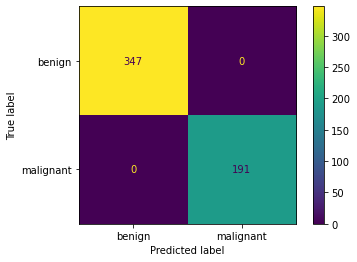

In [149]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, grid_search.predict(X_train_norm))
cmd = ConfusionMatrixDisplay(cm, display_labels=['benign','malignant']) # benign is 0 and malignant is 1
cmd.plot()

### Confusion matrix on the test set

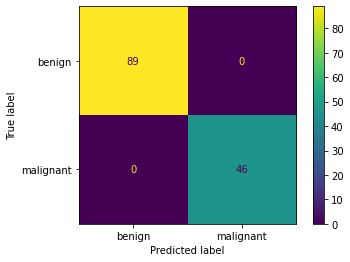

In [150]:
cm = confusion_matrix(y_test, grid_search.predict(X_test_norm))
cmd = ConfusionMatrixDisplay(cm, display_labels=['benign','malignant'])
cmd.plot()